# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

# Data preparation

In [2]:
df = pd.read_csv("tmdb_5000_movies.csv")

In [3]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [4]:
x = df.iloc[0]
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [5]:
x["genres"]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [6]:
x["keywords"]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [7]:
j = json.loads(x["genres"])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [8]:
' '.join(''.join(jj["name"].split()) for jj in j)

'Action Adventure Fantasy ScienceFiction'

In [9]:
# convert the relevent data for each movie into  single string
# to be ingested by TfidfVectorizer
def genres_and_keywords_to_strings(row):
    genres = json.loads(row['genres'])
    genres = ' '.join(''.join(g['name'].split()) for g in genres)
    
    keywords = json.loads(row['keywords'])
    keywords = ' '.join(''.join(k['name'].split()) for k in keywords)
    
    return "%s %s" % (genres, keywords)


In [10]:
# create new column as string representation of each movie
df['string'] = df.apply(genres_and_keywords_to_strings, axis = 1)

In [11]:
# create a tf-idef verctoriser object
tfidf = TfidfVectorizer(max_features=2000)

In [12]:
# create a data matrix from the overviews
x = tfidf.fit_transform(df['string'])

In [13]:
x

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [14]:
# generate a mapping from movie title -> index (in df)

movie2idx = pd.Series(df.index, index=df['title'])
movie2idx

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [15]:
idx = movie2idx['Scream 3']
idx

1164

In [16]:
query = x[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [17]:
# print the query vector
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [18]:
# compute the similarity between query and evry vector in x
scores = cosine_similarity(query, x)
scores

array([[0., 0., 0., ..., 0., 0., 0.]])

In [19]:
# currently the array is 1xN, make it just a 1-D array
scores = scores.flatten()

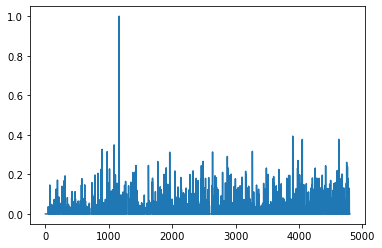

In [20]:
plt.plot(scores)

In [21]:
(-scores).argsort()

array([1164, 3902, 4628, ..., 1714, 1720, 4802], dtype=int64)

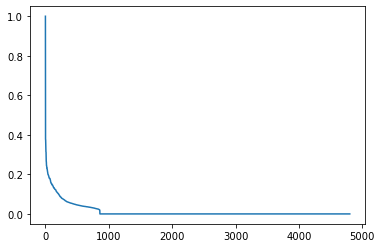

In [22]:
plt.plot(scores[(-scores).argsort()])

In [23]:
# get top 5 matches
# exclude self (similarity between query and itself yields max score)
recommended_idx = (-scores).argsort()[1:6]

In [24]:
# convert indices back to titles
df['title'].iloc[recommended_idx]

3902    Friday the 13th Part VI: Jason Lives
4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
1084                         The Glimmer Man
Name: title, dtype: object

# Generate the recommendations

In [25]:
# create a func that generates recommendation
def recommend(title):
    # get the row in the df for this movie
    idx = movie2idx[title]
    if type(idx)==pd.Series:
        idx = idx.iloc[0]
        
    # calculate the pairewise similarities for this movie
    query = x[idx]
    scores = cosine_similarity(query, x)
    
    # currently the array is 1xN, make it just a 1-D array
    scores = scores.flatten()
    
    # get the indexes of the highest scoring movies
    # get the first K recommendations
    # don't return itself!
    recommended_idx = (-scores).argsort()[1:6]
    
    # return the titles of the recommendations
    return df['title'].iloc[recommended_idx]

# Test

In [26]:
print("Recommendations for 'Scream 3': ")
print(recommend('Scream 3'))

Recommendations for 'Scream 3': 
3902    Friday the 13th Part VI: Jason Lives
4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
1084                         The Glimmer Man
Name: title, dtype: object


In [27]:
print("Recommendations for 'Mortal Kombat': ")
print(recommend('Mortal Kombat'))

Recommendations for 'Mortal Kombat': 
1611              Mortal Kombat: Annihilation
1670                       DOA: Dead or Alive
3856              In the Name of the King III
1001    Street Fighter: The Legend of Chun-Li
2237                        Alone in the Dark
Name: title, dtype: object


In [28]:
print("Recommendations for 'Runaway Bride': ")
print(recommend('Runaway Bride'))

Recommendations for 'Runaway Bride': 
4115                    House of D
2325    My Big Fat Greek Wedding 2
4604         It Happened One Night
3313                  An Education
2689            Our Family Wedding
Name: title, dtype: object


In [34]:
print("Recommendations for 'Interstellar': ")
print(recommend('Interstellar'))

Recommendations for 'Interstellar': 
635                     Apollo 13
4332               Silent Running
643                 Space Cowboys
222                       Elysium
4108    In the Shadow of the Moon
Name: title, dtype: object
